<center>
  <h1 style="background-color:BLACK; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">WINE QUALITY PREDICTION</h1>
</center>

<center><img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2021/04/45245download.jpg"style></center>

# <center style="border:2px solid black;">PROJECT OVERVIEW </center>

<h3>Overview:</h3>
Wine quality prediction is a crucial task in the wine industry, aiming to assess and predict the perceived quality of wines based on various chemical properties. In this context, two datasets are available, each containing information about the red and white variants of the Portuguese "Vinho Verde" wine. These datasets provide a comprehensive collection of attributes, such as chemical composition and physical characteristics, which influence the final quality of the wines. By applying machine learning and statistical analysis to these datasets, it is possible to build predictive models that can estimate the quality of the wines, thus assisting winemakers, sommeliers, and consumers in making informed decisions.

<h3>Objective:</h3>
The objective of wine quality prediction using the red and white variants of the "Vinho Verde" wine datasets is to develop accurate and reliable models that can predict the quality of the wines based on their chemical and physical attributes. The goal is to create models that can generalize well to new, unseen data, allowing for the assessment of wine quality without the need for extensive and time-consuming sensory evaluations. These predictive models can provide several benefits:

<h3>Quality Assessment:</h3> Winemakers and producers can use the predictive models to quickly assess the quality of new batches of wine without relying solely on expert opinions or time-consuming sensory tests.

<h3>Quality Improvement:</h3> By analyzing the relationships between various chemical components and wine quality, insights can be gained into which attributes have the most significant impact on wine quality. This information can guide efforts to improve wine production processes.

<h3>Cost Efficiency:</h3> Traditional methods of evaluating wine quality often involve sensory panels and expert evaluations, which can be resource-intensive. Predictive models offer a more cost-effective and efficient alternative.

<h3>Consumer Guidance:</h3> Consumers can benefit from these models by having an objective estimate of the quality of a wine before purchasing. This can help them make more informed choices based on their preferences.

<h3>Research and Innovation:</h3> The datasets and models can also serve as valuable resources for researchers and analysts in the wine industry, enabling them to explore correlations between attributes and quality and potentially leading to new insights and innovations.<br></br>

In summary, the objective of wine quality prediction using the "Vinho Verde" wine datasets is to leverage machine learning techniques to create accurate models that can predict the quality of wines based on their chemical and physical characteristics. These models have the potential to streamline the quality assessment process, enhance production practices, and provide valuable information to both industry professionals and consumers

# Install Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DATA PREPARATION

In [74]:
df = pd.read_csv("/kaggle/input/wine-quality1/wine Proj.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,12
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [75]:
# show bottom 5 records only
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6480,red,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
6481,red,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
6482,red,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
6483,red,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6


In [76]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6474.000000,6477.000000,6481.000000,6482.000000,6482.000000,6484.000000,6484.000000,6484.000000,6475.000000,6481.000000,6484.000000,6484.000000
mean,7.218373,0.339289,0.318991,5.449954,0.056007,30.530999,115.883020,0.994696,3.217964,0.530890,10.490952,5.819402
std,1.297190,0.164440,0.145175,4.760719,0.035061,17.764290,56.488804,0.003001,0.160541,0.148695,1.193080,0.877286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992320,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996993,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,12.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6484 non-null   object 
 1   fixed acidity         6474 non-null   float64
 2   volatile acidity      6477 non-null   float64
 3   citric acid           6481 non-null   float64
 4   residual sugar        6482 non-null   float64
 5   chlorides             6482 non-null   float64
 6   free sulfur dioxide   6484 non-null   float64
 7   total sulfur dioxide  6484 non-null   float64
 8   density               6484 non-null   float64
 9   pH                    6475 non-null   float64
 10  sulphates             6481 non-null   float64
 11  alcohol               6484 non-null   float64
 12  quality               6484 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 658.7+ KB


In [147]:
# show all columns present in your dataset
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [148]:
#Show datatypes of each columns
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [149]:
df.shape

(6484, 13)

In [153]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [156]:
df.loc[df.duplicated()].head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
39,white,7.3,0.24,0.39,17.95,0.057,45.0,149.0,0.9999,3.21,0.36,8.6,5
48,white,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.9954,3.13,0.46,9.8,6
61,white,6.0,0.19,0.26,12.40,0.048,50.0,147.0,0.9972,3.30,0.36,8.9,6


In [157]:
# identify rows with duplicate values in a specific column named 'type' within a DataFrame named 'df'.
df.loc[df.duplicated(subset=['type'])]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,92.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6480,red,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
6481,red,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
6482,red,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7


# DATA PROCESSING

In [78]:
#to calculate the number of missing (null) values in each column of a pandas DataFrame named 'df'.
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         7
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                3
alcohol                  0
quality                  0
dtype: int64

In [79]:
# We have to fill the missing values
#Return a Series containing counts of unique rows in the DataFrame.
df["fixed acidity"].value_counts()

6.80     353
6.60     325
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: fixed acidity, Length: 106, dtype: int64

In [80]:
# impute with mean for numerical values and for categorical with mode
#Fill NA/NaN values using the specified method.
mean = df["fixed acidity"].mean()
df["fixed acidity"].fillna(mean, inplace = True)
df["fixed acidity"].isnull().sum()

0

In [81]:
mean2 = df["volatile acidity"].mean()
df["volatile acidity"].fillna(mean, inplace = True)
df["volatile acidity"].isnull().sum()

0

In [82]:
mean3 = df["citric acid"].mean()
df["citric acid"].fillna(mean,inplace=True)
df["citric acid"].isnull().sum()

0

In [83]:
mean5 = df["chlorides"].mean()
df["chlorides"].fillna(mean,inplace=True)
df["chlorides"].isnull().sum()

0

In [84]:
mean6 = df["pH"].mean()
df["pH"].fillna(mean,inplace=True)
df["pH"].isnull().sum()

0

In [85]:
mean7 = df["sulphates"].mean()
df["sulphates"].fillna(mean,inplace=True)
df["sulphates"].isnull().sum()

0

In [86]:
## Successfully imputed missing values with mean
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [158]:
#Checking an example duplicate
df.query('type == "red"')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6480,red,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
6481,red,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
6482,red,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7


In [159]:
# Count of types 
df['type'].value_counts()

white    4898
red      1586
Name: type, dtype: int64

# GRAPHES AND VISUALIZATIONS

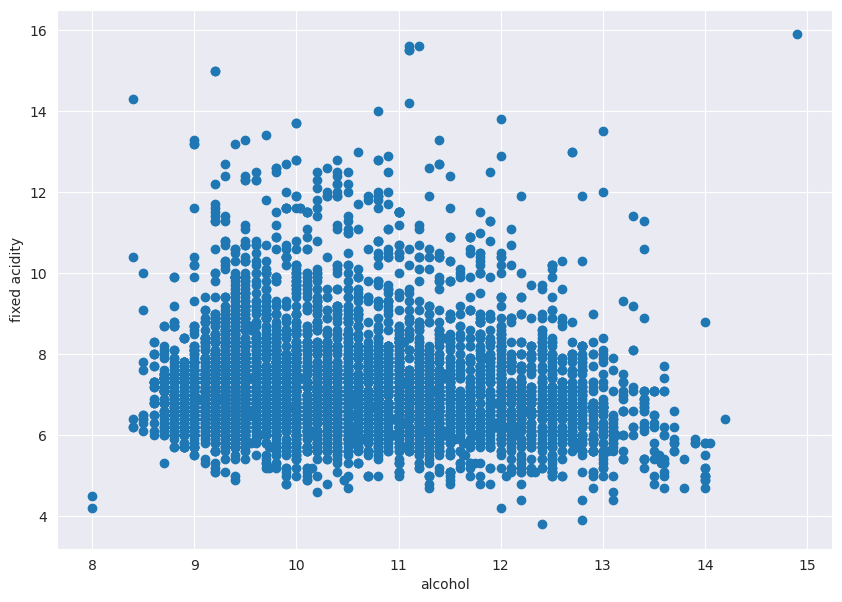

In [87]:
#Show plots
plt.figure(figsize = (10, 7))
plt.scatter(x = "alcohol", y = "fixed acidity", data = df)
plt.xlabel("alcohol")
plt.ylabel("fixed acidity")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_33/958309559.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust figure layout


[]

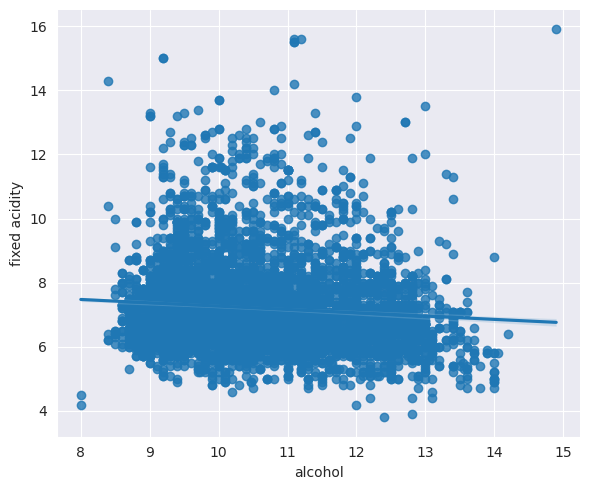

In [88]:
#seaborn.lmplot() method is used to draw a scatter plot with regression line
sns.lmplot(x = "alcohol", y = "fixed acidity", data = df, aspect=1.2)
plt.tight_layout()  # Adjust figure layout
# Shoe Plot
plt.plot()


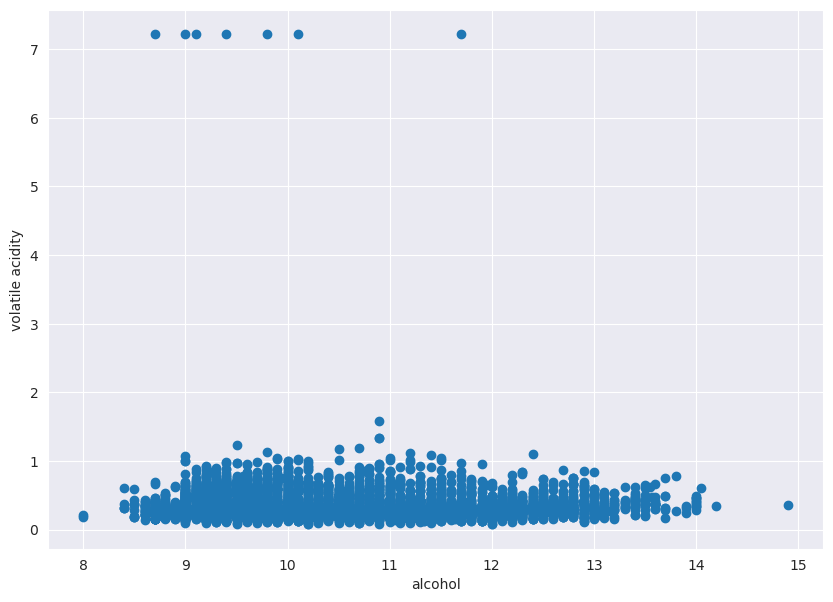

In [89]:
# There are significant outliers present here
plt.figure(figsize = (10, 7))
plt.scatter(x = "alcohol", y = "volatile acidity", data = df)
plt.xlabel("alcohol")
plt.ylabel("volatile acidity")
plt.show()


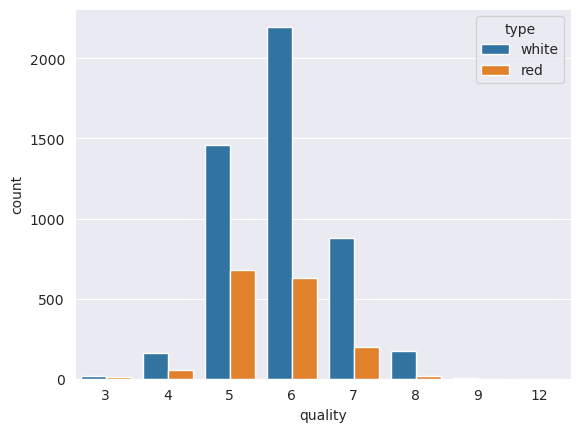

In [90]:
sns.set_style(style="darkgrid") # set theme
sns.countplot(x = "quality",hue="type", data = df) # Show the counts of observations in each categorical bin using bars.
plt.show()

/tmp/ipykernel_33/1483947705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["quality"],bins=10)


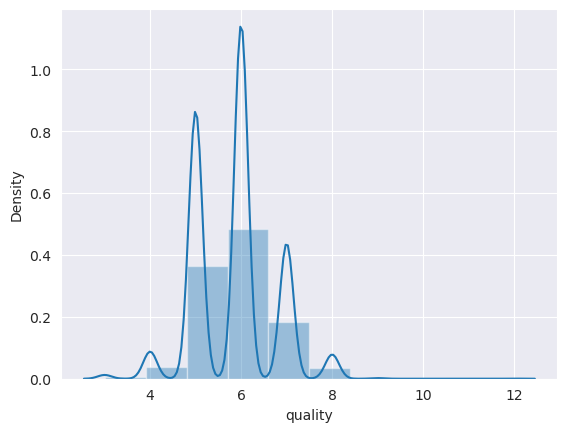

In [91]:
sns.distplot(df["quality"],bins=10)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

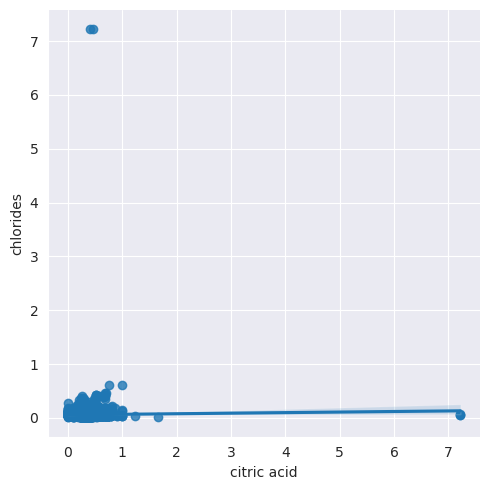

In [92]:
plt.figure(figsize=(10,7))
sns.lmplot(x = "citric acid", y = "chlorides", data = df)
plt.show()

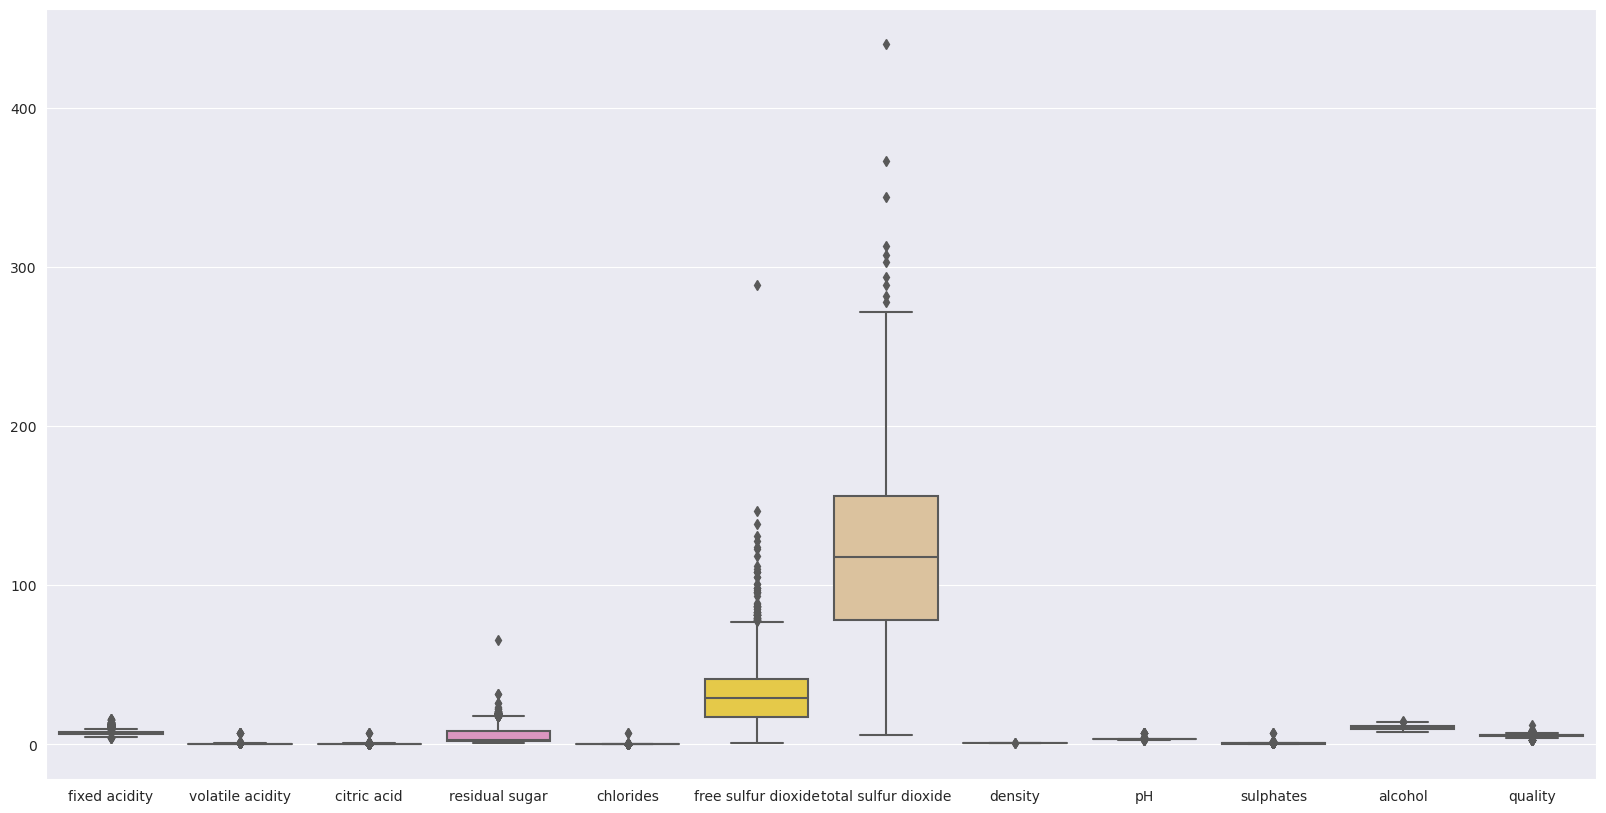

In [93]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df, palette = "Set2")
plt.show()

# REMOVE OUTLIERS

In [94]:
Q1 = df["free sulfur dioxide"].quantile(0.25)
print(Q1)

17.0


In [95]:
Q3 = df["free sulfur dioxide"].quantile(0.75)
print(Q3)

41.0


In [96]:
IQR = Q3 - Q1
print(IQR)

24.0


In [97]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-19.0 77.0


In [98]:
df["free sulfur dioxide"].shape

(6484,)

In [99]:
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]

In [100]:
df2["free sulfur dioxide"].shape

(6417,)

In [101]:
df.shape[0] - df2.shape[0]

67

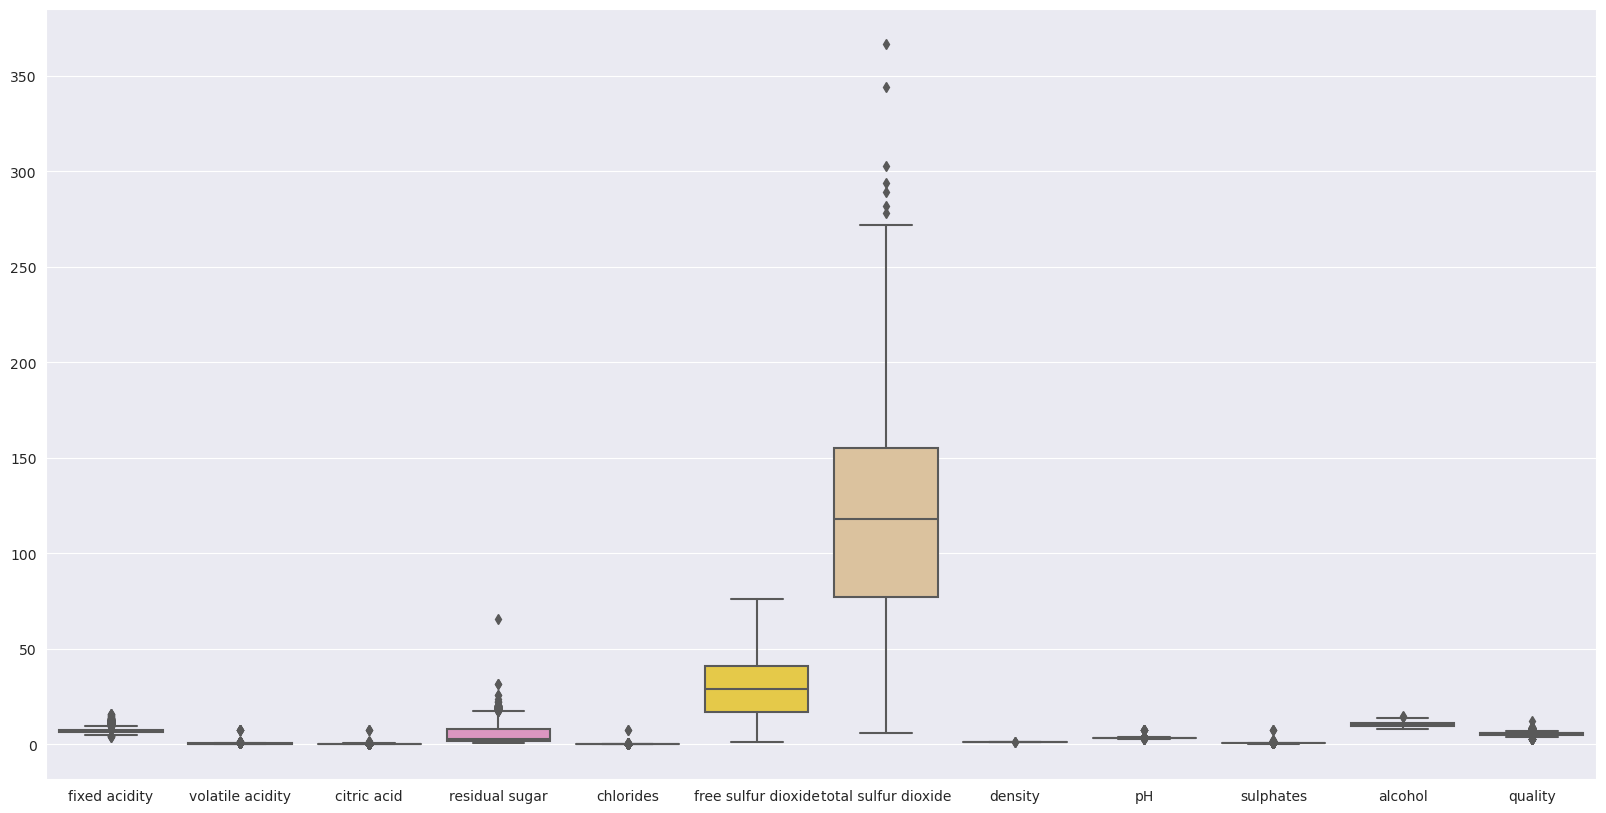

In [102]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df2, palette = "Set2")
plt.show()

In [103]:
df2.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [104]:
Q1 = df2["total sulfur dioxide"].quantile(0.25)
print(Q1)

77.0


In [105]:
Q3 = df2["total sulfur dioxide"].quantile(0.75)
print(Q3)

155.0


In [106]:
IQR = Q3 - Q1
print(IQR)

78.0


In [107]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-40.0 272.0


In [108]:
df2["total sulfur dioxide"].shape

(6417,)

In [109]:
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]

In [110]:
df3["total sulfur dioxide"].shape

(6409,)

In [111]:
df2.shape[0] - df3.shape[0]

8

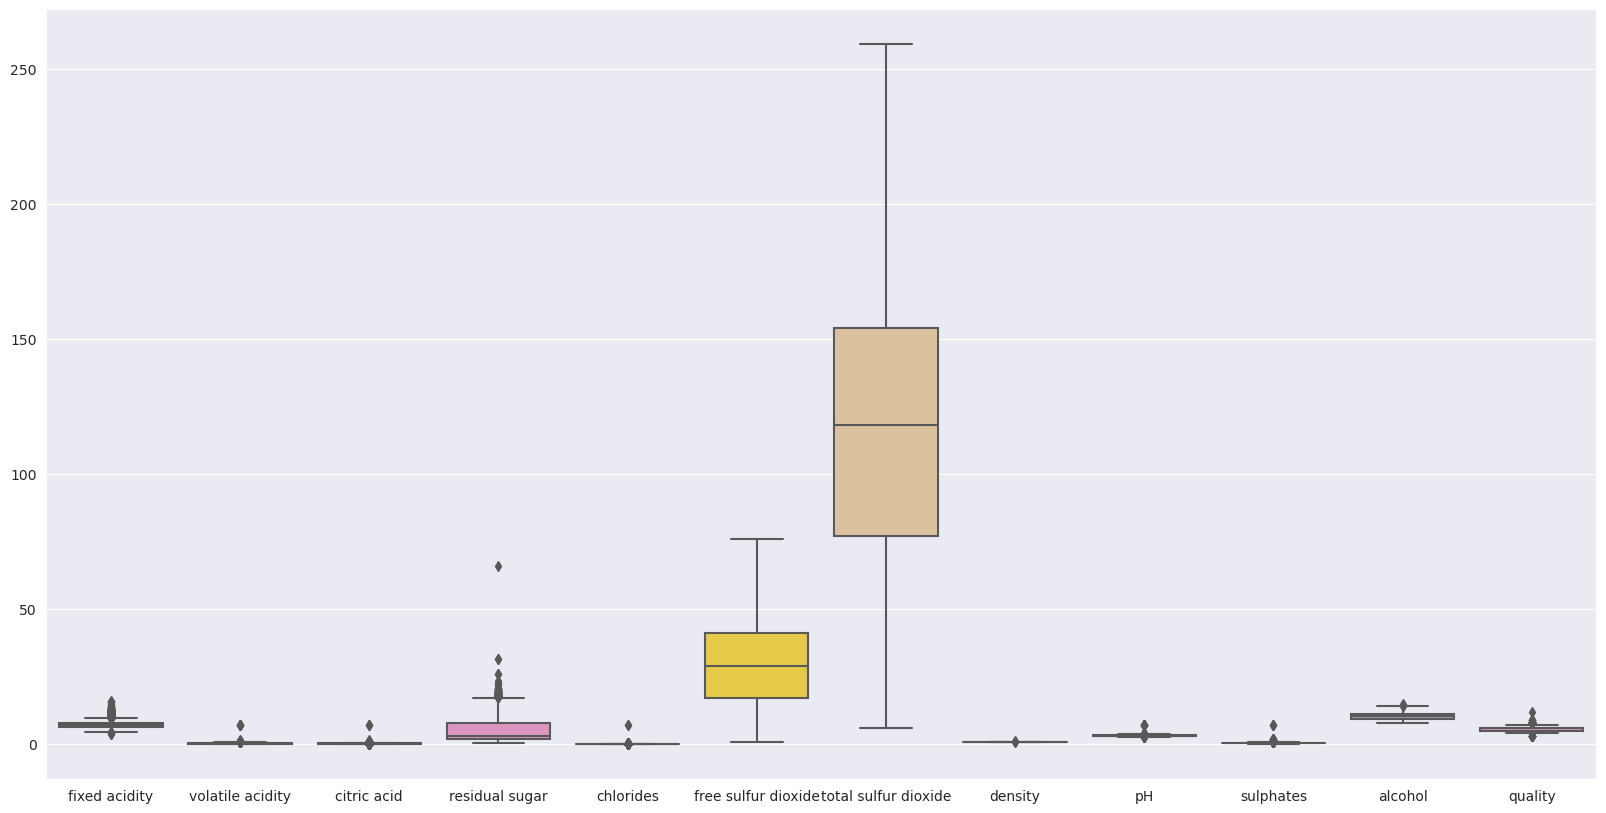

In [112]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df3, palette = "Set2")
plt.show()

In [113]:
df3.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [114]:
Q1 = df3["residual sugar"].quantile(0.25)
print(Q1)

1.8


In [115]:
Q3 = df3["residual sugar"].quantile(0.75)
print(Q3)

8.0


In [116]:
IQR = Q3 - Q1
print(IQR)

6.2


In [117]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-7.500000000000001 17.3


In [118]:
df3["residual sugar"].shape

(6409,)

In [121]:
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]

In [122]:
df4["residual sugar"].shape

(6263,)

In [123]:
df3.shape[0] - df4.shape[0]

146

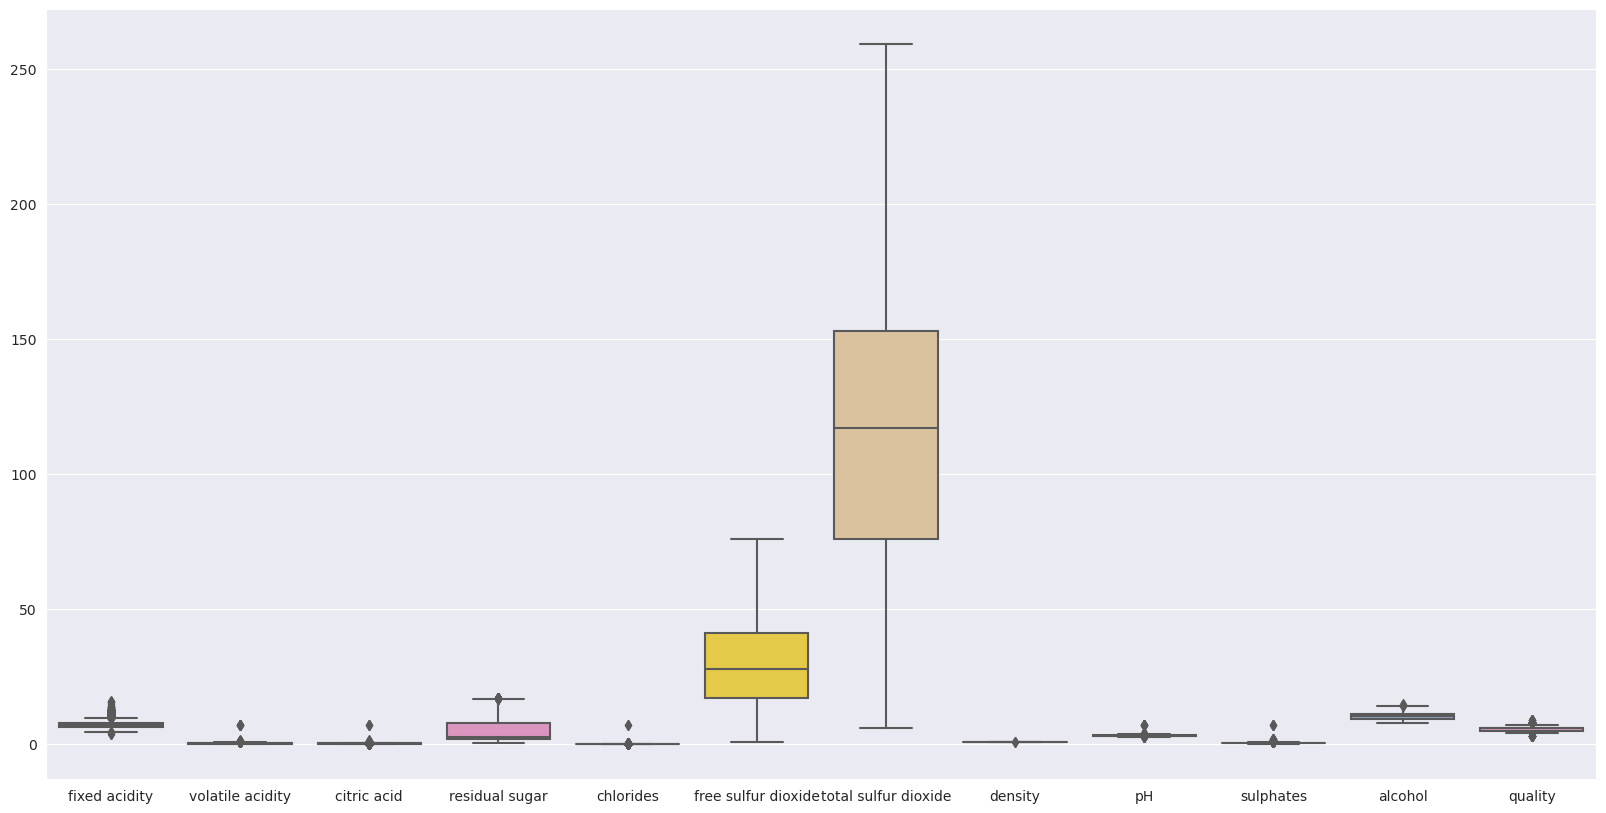

In [125]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df4, palette = "Set2")
plt.show()

In [126]:
df4.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [127]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6263 entries, 1 to 6483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6263 non-null   object 
 1   fixed acidity         6263 non-null   float64
 2   volatile acidity      6263 non-null   float64
 3   citric acid           6263 non-null   float64
 4   residual sugar        6263 non-null   float64
 5   chlorides             6263 non-null   float64
 6   free sulfur dioxide   6263 non-null   float64
 7   total sulfur dioxide  6263 non-null   float64
 8   density               6263 non-null   float64
 9   pH                    6263 non-null   float64
 10  sulphates             6263 non-null   float64
 11  alcohol               6263 non-null   float64
 12  quality               6263 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 685.0+ KB


In [145]:
df4 = pd.concat([df4, dummies], axis = 1)

In [146]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,white,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1,1,1
5,8.1,0.28,0.40,6.9,0.050,30.0,92.0,0.9951,3.26,0.44,10.1,1,1,1,1


In [135]:
df4.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,white
6479,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,0,0
6480,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5,0,0
6481,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,0,0
6482,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,0,0
6483,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6,0,0


# MAPPING "QUALITY" WITH 3 CLASSES
We want the quality 0,1,2 class

In [136]:
df4.quality.value_counts()

6    2731
5    2038
7    1063
4     213
8     188
3      25
9       5
Name: quality, dtype: int64

In [137]:
quality_map = {3 : "Low",4 : "Low", 5 : "Medium", 6 : "Medium", 7 : "Medium", 8 : "High", 9 : "High"}
df4["quality"] = df4["quality"].map(quality_map)

In [138]:
df4.quality.value_counts()

Medium    5832
Low        238
High       193
Name: quality, dtype: int64

In [139]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1,1
5,8.1,0.28,0.40,6.9,0.050,30.0,92.0,0.9951,3.26,0.44,10.1,Medium,1,1


In [140]:
df4.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,white
6479,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,Medium,0,0
6480,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,Medium,0,0
6481,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,Medium,0,0
6482,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,Medium,0,0
6483,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,Medium,0,0


In [141]:
map_quality = {"Low" : 0, "Medium" : 1, "High" : 2}
df4["quality"] = df4["quality"].map(map_quality)

In [143]:
df4.quality.value_counts()

1    5832
0     238
2     193
Name: quality, dtype: int64

In [144]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1,1
5,8.1,0.28,0.40,6.9,0.050,30.0,92.0,0.9951,3.26,0.44,10.1,1,1,1
